In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import generator as gen
from src.estimators import SNNEstimator, RidgeEstimator
from src.general_snn import general_snn
from src import anchor_matrix as am

In [2]:
def print_analytics(RMSEs, MAEs, rating_matrix, Y_restored):
  print(f"RMSE: {np.mean(RMSEs):.4f}±{np.sqrt(np.var(RMSEs)):.3f}")
  print(f"MAE: {np.mean(MAEs):.4f}±{np.sqrt(np.var(MAEs)):.3f}")
  # distribution of true vs restored samples:
  plt.hist(rating_matrix.flatten(), bins=100, alpha=0.3, label="true ratings")
  plt.hist(Y_restored.flatten(), bins=100, color='C0', alpha=0.7, label="restored ratings")
  plt.xlabel('ratings')
  plt.ylabel('frequency')
  plt.grid(alpha=0.5)
  plt.legend()
  plt.legend(loc="upper right");

In [3]:
inv_scale=1

rating_matrix, P = gen.getRatingAndPropensityMatrix(inv_scale=inv_scale)

### 1.1 Baseline: Best Submatrix, SNN unmodified

 79/80RMSE: 0.3525±0.000
MAE: 0.2008±0.000


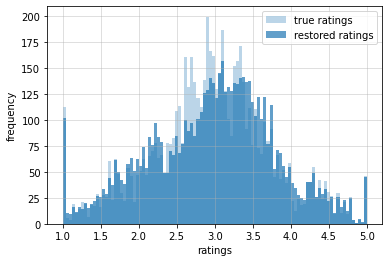

In [6]:
RMSEs = []
MAEs = []
for _ in range(1):
    D = np.random.binomial(1, P)
    Y = rating_matrix.copy()
    Y[D == 0] = np.nan
    Y_restored = general_snn(
      D, Y,
      biclique_search=am.biclique_find,
      estimator=SNNEstimator(),
      num_estimates=1,
      min_val=1, max_val=5,
      print_progress=True
    )
    Error = (rating_matrix - Y_restored).flatten()
    RMSEs.append(np.sqrt(np.mean(Error ** 2)))
    MAEs.append(np.mean(np.abs(Error)))

print_analytics(RMSEs, MAEs, rating_matrix, Y_restored)

### 1.2 Baseline-opt: Best Submatrix, SNN with better params

 79/80RMSE: 0.2418±0.000
MAE: 0.1136±0.000


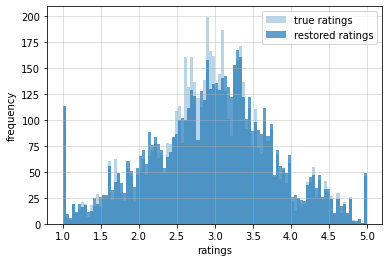

In [7]:
RMSEs = []
MAEs = []
for _ in range(1):
    D = np.random.binomial(1, P)
    Y = rating_matrix.copy()
    Y[D == 0] = np.nan
    Y_restored = general_snn(
      D, Y,
      biclique_search=am.biclique_find,
      estimator=SNNEstimator(spectral_rank_fun=lambda s, m, n: 5),
      num_estimates=1,
      min_val=1, max_val=5,
      print_progress=True
    )
    Error = (rating_matrix - Y_restored).flatten()
    RMSEs.append(np.sqrt(np.mean(Error ** 2)))
    MAEs.append(np.mean(np.abs(Error)))

print_analytics(RMSEs, MAEs, rating_matrix, Y_restored)

## 2. Randomized solutions

### 2.1 Randomized + SNN

 79/80RMSE: 0.2707±0.000
MAE: 0.1586±0.000


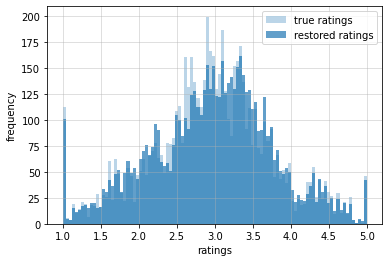

In [9]:
RMSEs = []
MAEs = []
for _ in range(1):
    D = np.random.binomial(1, P)
    Y = rating_matrix.copy()
    Y[D == 0] = np.nan
    Y_restored = general_snn(
      D, Y,
      biclique_search=am.biclique_random,
      estimator=SNNEstimator(spectral_rank_fun=lambda s, m, n: 3),
      #estimator=RidgeEstimator(),
      num_estimates=5,
      min_val=1, max_val=5,
      print_progress=True
    )
    Error = (rating_matrix - Y_restored).flatten()
    RMSEs.append(np.sqrt(np.mean(Error ** 2)))
    MAEs.append(np.mean(np.abs(Error)))

print_analytics(RMSEs, MAEs, rating_matrix, Y_restored)

### 2.2 Randomized + Ridge

 79/80RMSE: 0.0917±0.000
MAE: 0.0440±0.000


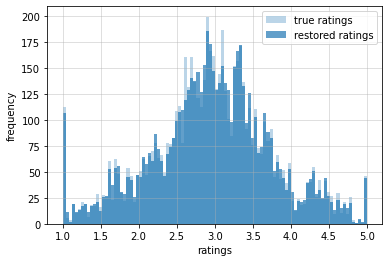

In [10]:
RMSEs = []
MAEs = []
for _ in range(1):
    D = np.random.binomial(1, P)
    Y = rating_matrix.copy()
    Y[D == 0] = np.nan
    Y_restored = general_snn(
      D, Y,
      biclique_search=am.biclique_random,
      #estimator=SNNEstimator(spectral_rank_fun=lambda s, m, n: 3),
      estimator=RidgeEstimator(),
      num_estimates=5,
      min_val=1, max_val=5,
      print_progress=True
    )
    Error = (rating_matrix - Y_restored).flatten()
    RMSEs.append(np.sqrt(np.mean(Error ** 2)))
    MAEs.append(np.mean(np.abs(Error)))

print_analytics(RMSEs, MAEs, rating_matrix, Y_restored)